In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()  # select the kaggle.json file to upload

Saving varient.webp to varient.webp


{'varient.webp': b'RIFF\xcep\x00\x00WEBPVP8 \xc2p\x00\x00\xf0\xff\x02\x9d\x01*k\x03H\x02>Q"\x8fF\xa4\xa2!\xa1\xa2\x11*x\x90\n\tgn\xce\x94\x10\x13\xa6\xbd\xd61\xee\n:?|\x95$H\xf6\xb1\xc7kk\xcb\x8a\xb7\xc77\x9e3\xea\x9b\xeep\xfc\xdb\xdf\xa5N\x89V\xd2\xda\x8fO\x1eV\x9f\xe6\xfd~\xfei\xf7\x0f}\xaf\x89\x9c\xe9\xfb\xcf\x83>y\x9f\x95]A\xe8\xae\xfc\xb7\xe1Q\xa3\x7f\xe1\xffk\xbf3?\xb2|\x1aw\x7f\xd8\xce\xf7\xdf\xda?\xe1\xffm\xf7C\xfe\xd7uOA\x9f\xfa?\xcb{\xba\xff\xc3\xff\xb3\xfd\xb7\xe4\xb7\xca\x0f\xaf\xff\xf6\xff\xab\xfcd\xfb\x1d\xfeg\xfd\x93\xfd\xe7\xe77\xf9\x9f\x9c\xefh\xbf\xb6~\xd3\x9f\xb5\xc3\xdcF;\xc3\xfa\xe4$e1\xf3\xb6:\x03F\xff\x128\xdc]\xd1@\xedo\x0bYy\xbb\xfdY\x8f\x96\xc2\x16\xc5\x94I\xc4r\xbe\x8e\x12\xbb\xdb\x0e\xf7\xbc\xc4\xf6\xba\xee\\[\xc7\xa9\xae\xf8\xa3 0^\x9b0.\xbe\xbfk5 \xb3\xfa\xc6\xfc\x9c\xb8\xda\xbc\xc1Z\xc6\xa7s\x967\x94\xc5o\xff\xfe\xe0\x1c\x96\x92\x97ks\x1d\xd5\xc5\xfaVh\xca\x84\xdd\xf1\xab\xde\xca\x06\xce\xb1\x985W\xd7\xa3\xf0\xb1^\x00\x88\xb2\x90>X!\xbb|\xb8\xa0\xa2\xe9O%

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d slothkong/10-monkey-species --force

Dataset URL: https://www.kaggle.com/datasets/slothkong/10-monkey-species
License(s): CC0-1.0
100% 547M/547M [00:28<00:00, 22.2MB/s]
100% 547M/547M [00:28<00:00, 20.2MB/s]


In [6]:
!unzip -o 10-monkey-species.zip

Archive:  10-monkey-species.zip
  inflating: monkey_labels.txt       
  inflating: training/training/n0/n0018.jpg  
  inflating: training/training/n0/n0019.jpg  
  inflating: training/training/n0/n0020.jpg  
  inflating: training/training/n0/n0021.jpg  
  inflating: training/training/n0/n0022.jpg  
  inflating: training/training/n0/n0023.jpg  
  inflating: training/training/n0/n0024.jpg  
  inflating: training/training/n0/n0025.jpg  
  inflating: training/training/n0/n0026.jpg  
  inflating: training/training/n0/n0027.jpg  
  inflating: training/training/n0/n0028.jpg  
  inflating: training/training/n0/n0029.jpg  
  inflating: training/training/n0/n0030.jpg  
  inflating: training/training/n0/n0031.jpg  
  inflating: training/training/n0/n0032.jpg  
  inflating: training/training/n0/n0033.jpg  
  inflating: training/training/n0/n0034.jpg  
  inflating: training/training/n0/n0035.jpg  
  inflating: training/training/n0/n0036.jpg  
  inflating: training/training/n0/n0037.jpg  
  inflatin

In [7]:
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
from torchvision import models
import torch.optim as optim
import torch.nn as nn
import torch

# Define your transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


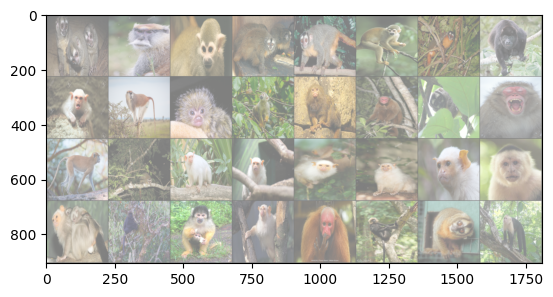

In [8]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torchvision

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the datasets
train_data = ImageFolder('training/training', transform=transform)
valid_data = ImageFolder('validation/validation', transform=transform)

# Define the split sizes for validation and test sets
valid_size = int(0.5 * len(valid_data))
test_size = len(valid_data) - valid_size

# Split the validation dataset into validation and test sets
valid_data, test_data = random_split(valid_data, [valid_size, test_size])

# Create data loaders
trainloader = DataLoader(train_data, batch_size=32, shuffle=True)
validloader = DataLoader(valid_data, batch_size=32, shuffle=True)
testloader = DataLoader(test_data, batch_size=32, shuffle=True)

# Get a batch of images from the trainloader
images, labels = next(iter(trainloader))

# Function to unnormalize and plot an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(img.permute(1, 2, 0))  # convert from Tensor image

# Show images
imshow(torchvision.utils.make_grid(images))
plt.show()

In [9]:
from torchvision import models
import torch.nn as nn

# Load the pre-trained model
model = models.resnet50(pretrained=True)

# Replace the last layer
model.fc = nn.Linear(model.fc.in_features, 10)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 195MB/s]


In [10]:
from torch.utils.data import DataLoader

# Define the batch size
batch_size = 32

# Create data loaders
trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
validloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


In [11]:
import torch.optim as optim
import torch.nn as nn

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')

print('Finished Training')


Epoch 1, loss: 1.6769023299217225
Epoch 2, loss: 0.4161801691566195
Epoch 3, loss: 0.13695147292954582
Epoch 4, loss: 0.06556879015905516
Epoch 5, loss: 0.05975639261305332
Epoch 6, loss: 0.04067982781146254
Epoch 7, loss: 0.03054408058524132
Epoch 8, loss: 0.02685570400208235
Epoch 9, loss: 0.022322551107832364
Epoch 10, loss: 0.016927086947751895
Finished Training


In [12]:
import torch

# Function to calculate accuracy
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for data in loader:
            images, labels = data
            if next(model.parameters()).is_cuda:  # If model is on GPU
                images = images.cuda()
                labels = labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    model.train()  # Set the model back to training mode
    return 100 * correct / total

# Calculate accuracies
train_accuracy = calculate_accuracy(trainloader, model)
test_accuracy = calculate_accuracy(testloader, model)
valid_accuracy = calculate_accuracy(validloader, model)

# Print accuracies
print(f'Training Accuracy: {train_accuracy}%')
print(f'Testing Accuracy: {test_accuracy}%')
print(f'Validation Accuracy: {valid_accuracy}%')


Training Accuracy: 100.0%
Testing Accuracy: 100.0%
Validation Accuracy: 99.26470588235294%


Saving varient.webp to varient (1).webp


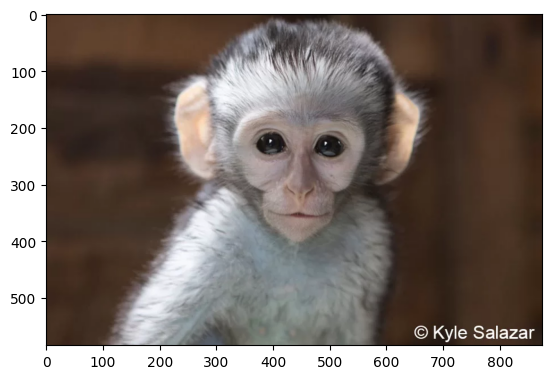

The model predicts that the image is of cebus_capucinus.


In [13]:
from google.colab import files
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Define the class names in the same order as in your training set
class_names = ['alouatta_palliata', 'erythrocebus_patas', 'cacajao_calvus', 'macaca_fuscata', 'cebuella_pygmea', 'cebus_capucinus', 'mico_argentatus', 'saimiri_sciureus', 'aotus_nigriceps', 'trachypithecus_johnii']

# Upload the image file (this will open a file explorer in your browser)
uploaded = files.upload()
image_path = next(iter(uploaded))

# Load the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.show()

# Apply the same transformations as you did for your validation set
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
image = transform(image)

# Add an extra dimension for batch (even though we're only using one image)
image = image.unsqueeze(0)

# Make sure the image tensor is on the same device as the model
if next(model.parameters()).is_cuda:
    image = image.cuda()

# Set the model to evaluation mode
model.eval()

# Make a prediction
output = model(image)

# Get the predicted class
_, predicted = torch.max(output.data, 1)
predicted_species = class_names[predicted.item()]

print(f'The model predicts that the image is of {predicted_species}.')


Saving varient.webp to varient (2).webp


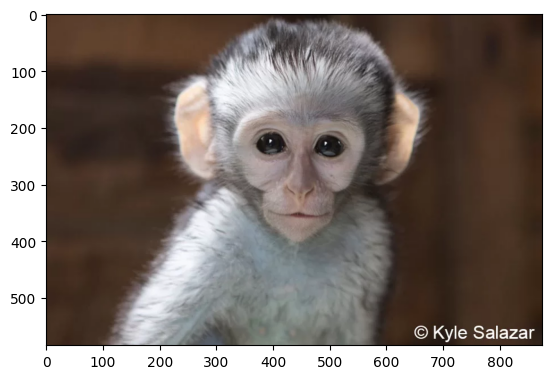

The model predicts that the image is of cebus_capucinus.


In [14]:
# Upload the image file (this will open a file explorer in your browser)
uploaded = files.upload()
image_path = next(iter(uploaded))

# Load the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.show()

# Apply the same transformations as you did for your validation set
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
image = transform(image)

# Add an extra dimension for batch (even though we're only using one image)
image = image.unsqueeze(0)

# Make sure the image tensor is on the same device as the model
if next(model.parameters()).is_cuda:
    image = image.cuda()

# Set the model to evaluation mode
model.eval()

# Make a prediction
output = model(image)

# Get the predicted class
_, predicted = torch.max(output.data, 1)
predicted_species = class_names[predicted.item()]

print(f'The model predicts that the image is of {predicted_species}.')